<a href="https://colab.research.google.com/github/kiran1442/customerSeg/blob/main/customer_segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Description

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Attribute Information:

1)InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2)StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3)Description: Product (item) name. Nominal.

4)Quantity: The quantities of each product (item) per transaction. Numeric.

5)InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

6)UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7)CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8)Country: Country name. Nominal, the name of the country where each customer resides.

# **What is Customer Segmentation?**

Customer segmentation is the process of separating customers into groups based on their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other.

The overall aim of this process is to identify customers that are the most profitable and the ones who churned out to prevent further loss of customers by redefining company policies.

# **Data Exploration**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/datasets/Copy of Online Retail.xlsx'
data = pd.read_excel(url)

## Data cleaning

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
520648,580294,22669,RED BABY BUNTING,15,2011-12-02 13:46:00,2.95,17364.0,United Kingdom
277837,561195,23159,SET OF 5 PANCAKE DAY MAGNETS,2,2011-07-25 13:57:00,2.08,14796.0,United Kingdom
356004,567981,20725,LUNCH BAG RED RETROSPOT,10,2011-09-23 11:22:00,4.96,NaN,United Kingdom
441043,574560,21262,WHITE GOOSE FEATHER CHRISTMAS TREE,6,2011-11-04 15:51:00,2.95,17703.0,United Kingdom
413581,572317,20735,BLACK MINI TAPE MEASURE,2,2011-10-23 16:13:00,0.85,14629.0,United Kingdom
160262,550458,22262,FELT EGG COSY CHICKEN,1,2011-04-18 13:13:00,1.63,NaN,United Kingdom
194564,553657,22197,SMALL POPCORN HOLDER,2,2011-05-18 11:28:00,0.85,14583.0,United Kingdom
380610,569825,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-10-06 12:23:00,3.75,15805.0,United Kingdom
477043,577046,79066K,RETRO MOD TRAY,10,2011-11-17 13:46:00,0.85,12449.0,Belgium
350895,567656,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,1,2011-09-21 14:40:00,3.29,14096.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df = pd.DataFrame(data)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


We have lots of null values in CustomerID column. These entries are not much of use to analyze data for customers. If we try to fill these values with any number it might adversely affect our results. Since we have very large data set we can ignore these entries and remove them from the dataset.

In [ ]:
null = df[df['CustomerID'].isnull()]
null.shape

(135080, 8)

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)


In [ ]:
len(df)

406829

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

401604

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


We have minimum Quantities as a negative value. On further analysis, we can see from InvoiceNo every entry starting from 'C'. These are cancellation orders so, the quantity is returned to the store.

Number of cancellations compared to total entries is small so we can ignore these cancellation entries.

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df=df[df['Quantity']>0]

In [ ]:
dataset=df

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
dataset.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


Minimum value of unit price is 0. This might be a free item(offer) entry.

## Data Visualization

<ipython-input-127-ad6e189cbe48>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




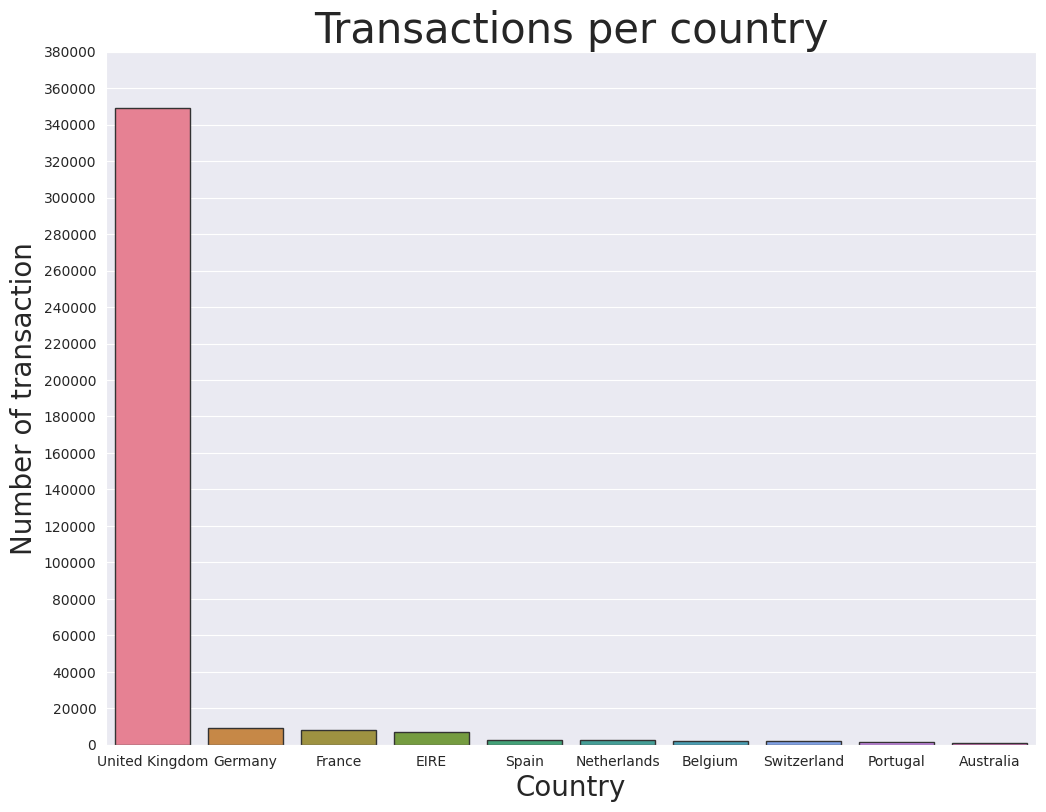

In [ ]:
# plot sales for top 10 counties
country_data = dataset.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(12,9))
top_countries = country_data[0:10]
colors = sns.color_palette('husl', n_colors=len(top_countries))

sns.set_style("darkgrid")
sns.barplot(data=country_data[0:10], x='Country', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2', palette=colors)
axes.set_yticks(range(0,400000,20000))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of transaction', size=20)
axes.set_title('Transactions per country', size=30)
for tick in axes.xaxis.get_major_ticks():
    # Corrected line to set the font size directly on the tick object
    tick.label1.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    # Corrected line to set the font size directly on the tick object
    tick.label1.set_fontsize(10)

We have data of one year. We can check total number of transactions per month

In [ ]:
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month)
dataset.head()

<ipython-input-63-55ef157b3c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('StockCode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StockCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='StockCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StockCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='StockCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Description'].value_counts()
    for x_label, grp in _df_14.groupby('StockCode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StockCode')
_ = plt.ylabel('Description')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['StockCode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='StockCode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['StockCode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Quantity', y='StockCode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Quantity', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
dataset.iloc[1999:2010, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
3210,536611,22865,HAND WARMER OWL DESIGN,12,2010-12-02 09:43:00,2.10,15752.0,United Kingdom,12
3211,536611,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-12-02 09:43:00,2.10,15752.0,United Kingdom,12
3212,536611,22632,HAND WARMER RED RETROSPOT,24,2010-12-02 09:43:00,2.10,15752.0,United Kingdom,12
3213,536611,22633,HAND WARMER UNION JACK,12,2010-12-02 09:43:00,2.10,15752.0,United Kingdom,12
3214,536611,21790,VINTAGE SNAP CARDS,12,2010-12-02 09:43:00,0.85,15752.0,United Kingdom,12
3215,536611,21889,WOODEN BOX OF DOMINOES,12,2010-12-02 09:43:00,1.25,15752.0,United Kingdom,12
3216,536611,22549,PICTURE DOMINOES,12,2010-12-02 09:43:00,1.45,15752.0,United Kingdom,12
3217,536611,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,3,2010-12-02 09:43:00,4.65,15752.0,United Kingdom,12
3218,536611,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,6,2010-12-02 09:43:00,2.95,15752.0,United Kingdom,12
3219,536611,62096A,PINK/YELLOW FLOWERS HANDBAG,6,2010-12-02 09:43:00,1.25,15752.0,United Kingdom,12


In [ ]:
dataset['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12


In [ ]:
dataset['Month'].nunique()#return total unique element

12

<ipython-input-70-9ad8c3710902>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_data, x='Month', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2', palette=colors)


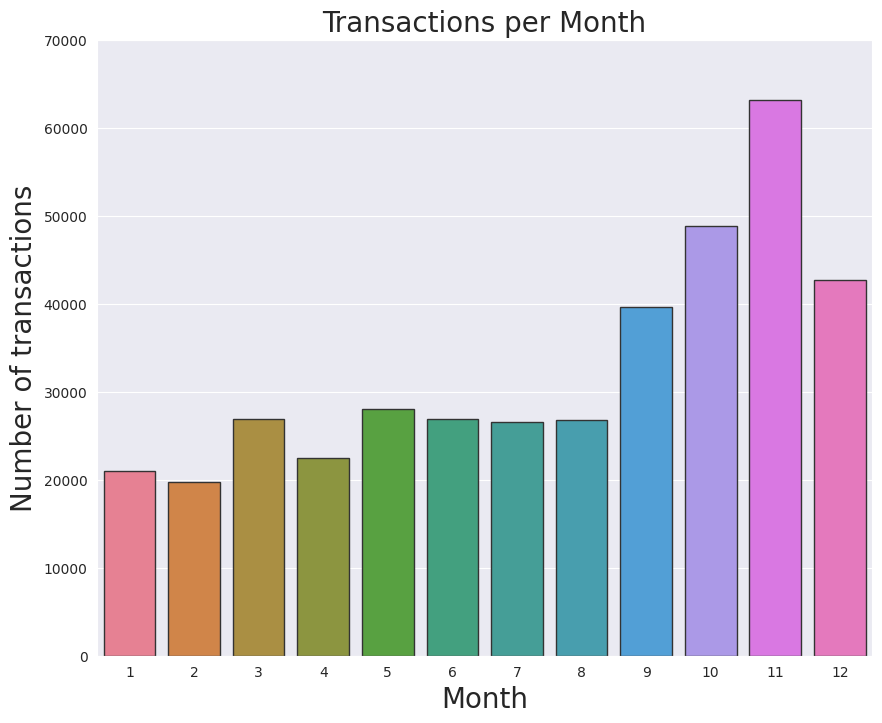

In [ ]:
# plot sales for top 10 counties
month_data = dataset.groupby('Month').count().reset_index()
fig, axes = plt.subplots(figsize=(10,8))
colors = sns.color_palette("husl", n_colors=len(month_data))
sns.set_style("darkgrid")
sns.barplot(data=month_data, x='Month', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2', palette=colors)
axes.set_yticks(range(0,80000,10000))
axes.set_xlabel('Month', size=20)
axes.set_ylabel('Number of transactions', size=20)
axes.set_title('Transactions per Month', size=20)
for tick in axes.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)

We can also calculate sales per customer. Number of transactions does not provide much more information related to profit but amount of money in the transaction provides more information. It is considered as MonetaryValue for the customer.

In [ ]:
# get Monetary Value for each customer from quantity and unit price
dataset['MonetaryValue'] = dataset.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)
dataset.head()

<ipython-input-71-876621c14184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MonetaryValue'] = dataset.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [ ]:
customer_data = dataset.groupby('CustomerID').sum(numeric_only=True).reset_index()
customer_data

,CustomerID,Quantity,UnitPrice,Month,MonetaryValue
0,12346.0,74215,1.04,1,77183.60
1,12347.0,2458,481.21,1383,4310.00
2,12348.0,2341,178.71,257,1797.24
3,12349.0,631,605.10,803,1757.55
4,12350.0,197,65.30,34,334.40
...,...,...,...,...,...
4334,18280.0,45,47.65,30,180.60
4335,18281.0,54,39.36,42,80.82
4336,18282.0,103,62.39,116,178.05
4337,18283.0,1357,1174.33,5251,2045.53


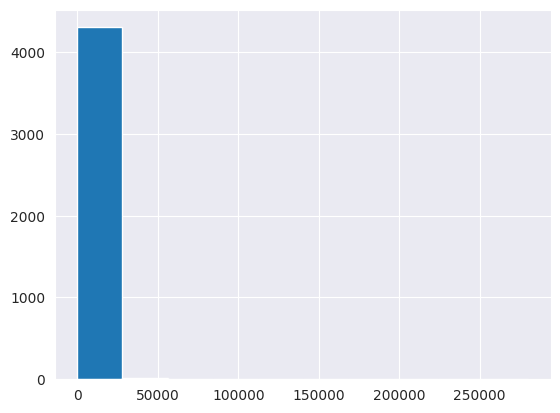

In [ ]:
import matplotlib.pyplot as plt
plt.hist(customer_data["MonetaryValue"])
plt.show()

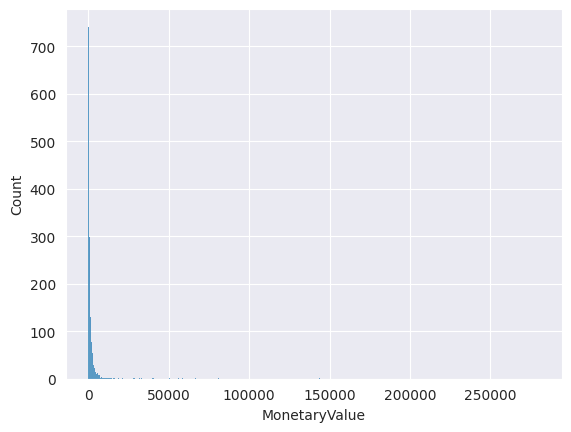

In [ ]:
sns.histplot(customer_data['MonetaryValue'])
plt.show()

How frequently a person buys product is also a good parameter to decide customer segmentation for that customer.

In [ ]:
customer_data.drop(columns=['Quantity', 'UnitPrice', 'Month'], inplace=True)

In [ ]:
customer_data['Frequency'] = dataset.groupby('CustomerID')['MonetaryValue'].count().values
customer_data

,CustomerID,MonetaryValue,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4334,18280.0,180.60,10
4335,18281.0,80.82,7
4336,18282.0,178.05,12
4337,18283.0,2045.53,721


<Axes: xlabel='Frequency', ylabel='Count'>

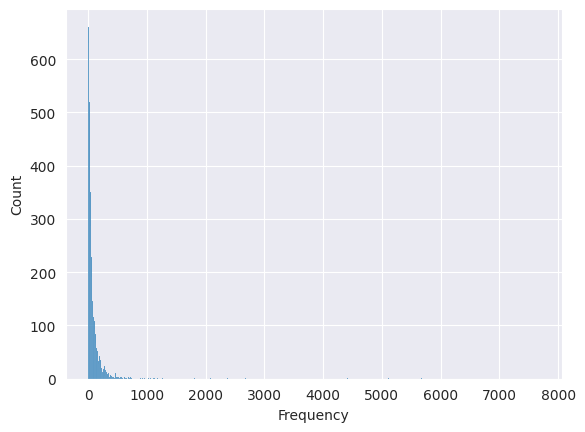

In [ ]:
sns.histplot(customer_data['Frequency'])

Recently joined customers might not have many purchases. So, we need to check how long since the customer is joined the company.

We can calculate how many days have passed since the last purchase made by the customer. This also gives us information about old customers and how active they are.

In [ ]:
# we have data till date 09/12/2011
# we will take next day as last date for calculation of time in number of days
last_date = date(2011,12,10)
# calculate time in days since last purchase order till the date
# get Monetary Value for each customer from quantity and unit price
dataset['Recency'] = dataset['InvoiceDate'].apply(lambda x: (last_date - pd.to_datetime(x).date()).days)
dataset.shape

<ipython-input-82-d6df90c584eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Recency'] = dataset['InvoiceDate'].apply(lambda x: (last_date - pd.to_datetime(x).date()).days)


(392732, 11)

In [ ]:
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,1


In [ ]:
dataset["CustomerID"].nunique()

4339

In [ ]:
customer_data['Recency'] = dataset.groupby('CustomerID')['Recency'].min().values
customer_data

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,3
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
...,...,...,...,...
4334,18280.0,180.60,10,278
4335,18281.0,80.82,7,181
4336,18282.0,178.05,12,8
4337,18283.0,2045.53,721,4


<Axes: xlabel='Recency', ylabel='Count'>

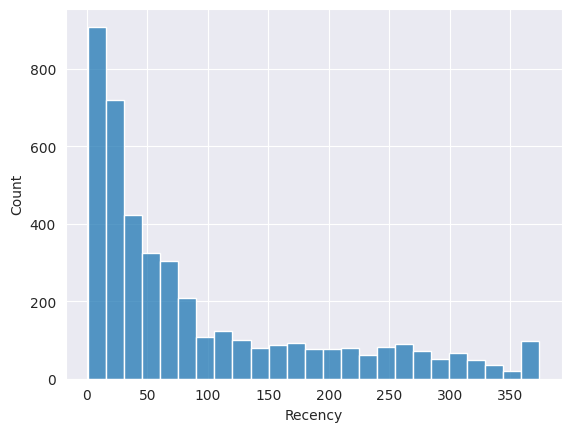

In [ ]:
sns.histplot(customer_data['Recency'])

## Data pre-processing

Our data is right-skewed. We can apply log transformation to remove the skewness.

In [ ]:
customer_data.describe()

,CustomerID,MonetaryValue,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2048.215924,90.512100,93.041484
std,1721.889758,8984.248352,225.515328,100.007757
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,306.455000,17.000000,18.000000
50%,15299.000000,668.560000,41.000000,51.000000
75%,16778.500000,1660.315000,98.000000,142.500000
max,18287.000000,280206.020000,7676.000000,374.000000


In [ ]:
# apply log transformation to remove skewness
# the minimum value for MonetaryValue is 0
# we need to add a small number to log transform this value (log of 0 will result in negative infinity)
customer_data['MonetaryValue'] = customer_data['MonetaryValue'].apply(lambda x: np.log(x + 1)) # add 1 for free items in sales
customer_data['Frequency'] = customer_data['Frequency'].apply(lambda x: np.log(x))
customer_data['Recency'] = customer_data['Recency'].apply(lambda x: np.log(x))
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


Text(0.5, 0.98, 'Data distribution after log transform')

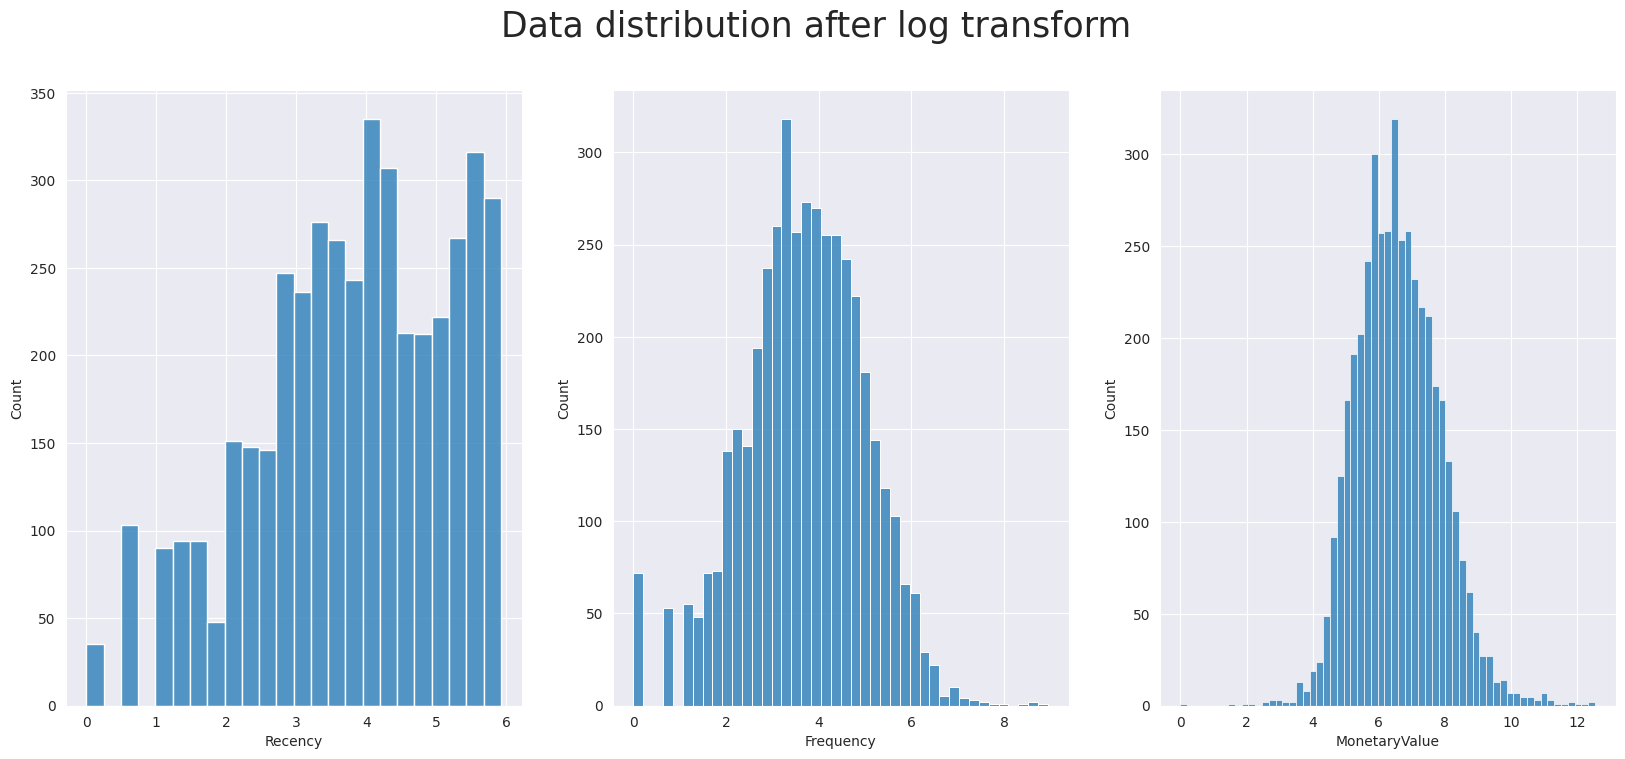

In [ ]:
# plot the data distribution after log transform
fig, axis = plt.subplots(nrows=1, ncols= 3, figsize=(20,8))
sns.histplot(customer_data['Recency'], ax=axis[0])
sns.histplot(customer_data['Frequency'], ax=axis[1])
sns.histplot(customer_data['MonetaryValue'], ax=axis[2])
fig.suptitle("Data distribution after log transform", size=25)

We have removed skewness from data now we can start with segmentation.

# **RFM Segmentation**

RFM stands for Recency, Frequency, and Monetary.
RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

In [ ]:
import plotly.express as px
fig =px.scatter_3d(customer_data, x = "Recency", y = "Frequency", z = "MonetaryValue"
                   )
fig.show()

# **K-Means Clustering**

Our dataset is large so Hierarchical clustering is not well suited for analysis. So, we will use the K-Means clustering algorithm, which is easy to apply fast, and accurate for clustering problems.


K-Means algorithm requires number of clusters as a parameter to group data points in clusters. To find the number of clusters we can use the Elbow method or Silhouette analysis.  

### Elbow Method

In [ ]:
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


In [ ]:
# CustomerID does not provide any information in clusturing
# remove the column from data
data = customer_data.drop(columns=['CustomerID'])
data.head()

,MonetaryValue,Frequency,Recency
0,11.253955,0.000000,5.786897
1,8.368925,5.204007,1.098612
2,7.494564,3.433987,4.330733
3,7.472245,4.290459,2.944439
4,5.815324,2.833213,5.739793


<Axes: title={'center': 'The Elbow Method'}, xlabel='k', ylabel='Sum of squared errors'>

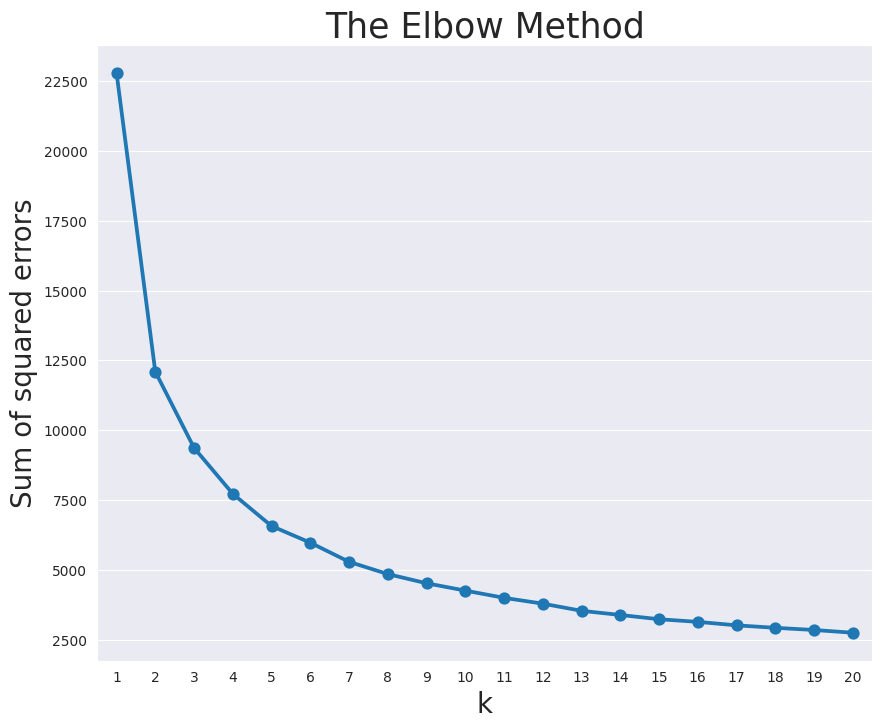

In [ ]:
# calculate Elbow method scores
sse = {} # sum of squared errors
# use cluster from range 1 to 20
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1,n_init='auto')
    # Fit KMeans on the dataset
    kmeans.fit(data)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ # Used for Plotting the elbow plot
# the elbow plot
plt.figure(figsize=(10,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20);
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

We can see that error is decreasing as K increases. For values of k at 4 or 5 slope of the curve is decreasing very fast this means errors do not decrease much faster as the increase in number of clusters.

These clusters represent customer segmentation and to utilize these segmentations company needs to invent new policies for each segment. So, increase in customer segment cause extra cost for company for implementation of new policies so very large value of k is not desirable.

We can keep value of k=4.

### Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.39432609725153106
For n_clusters = 3 The average silhouette_score is : 0.3006265214581385
For n_clusters = 4 The average silhouette_score is : 0.303931894046507
For n_clusters = 5 The average silhouette_score is : 0.28096540029440104
For n_clusters = 6 The average silhouette_score is : 0.25557702953029876
For n_clusters = 7 The average silhouette_score is : 0.26529881923743065
For n_clusters = 8 The average silhouette_score is : 0.2649177348011645


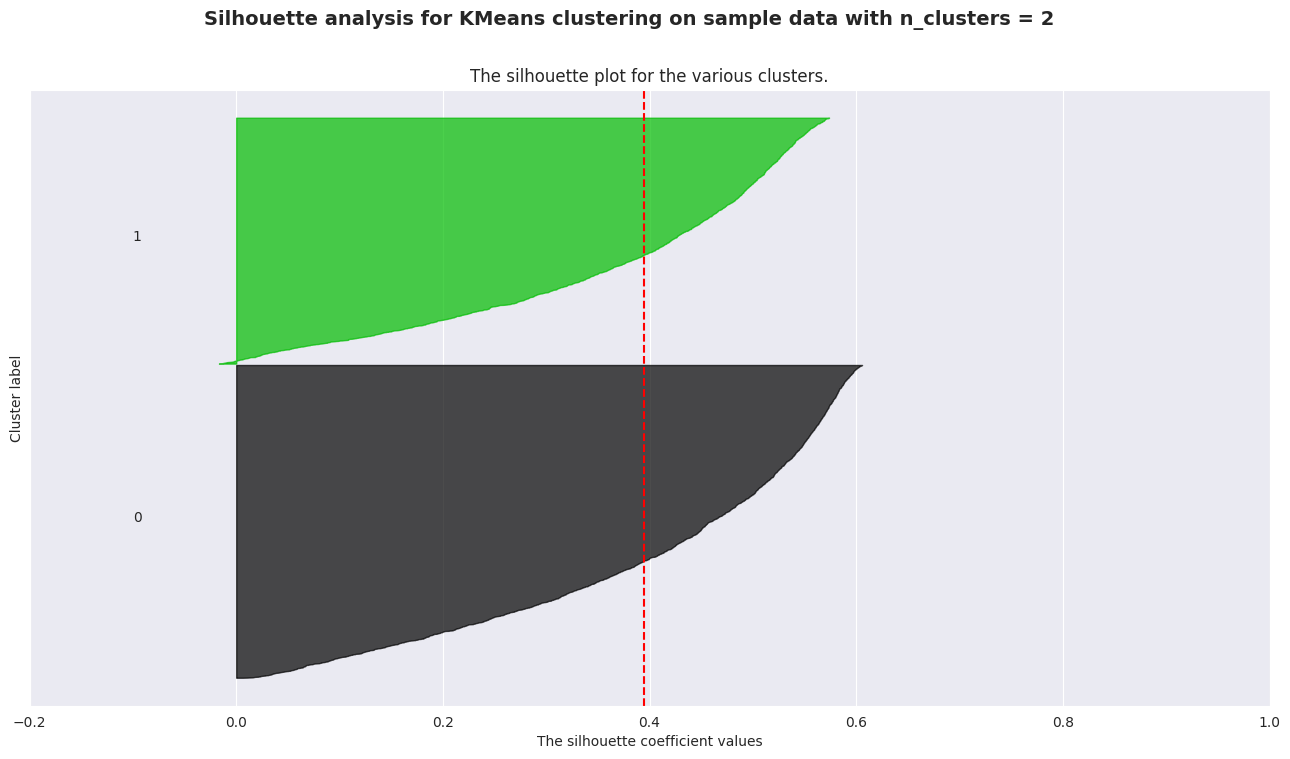

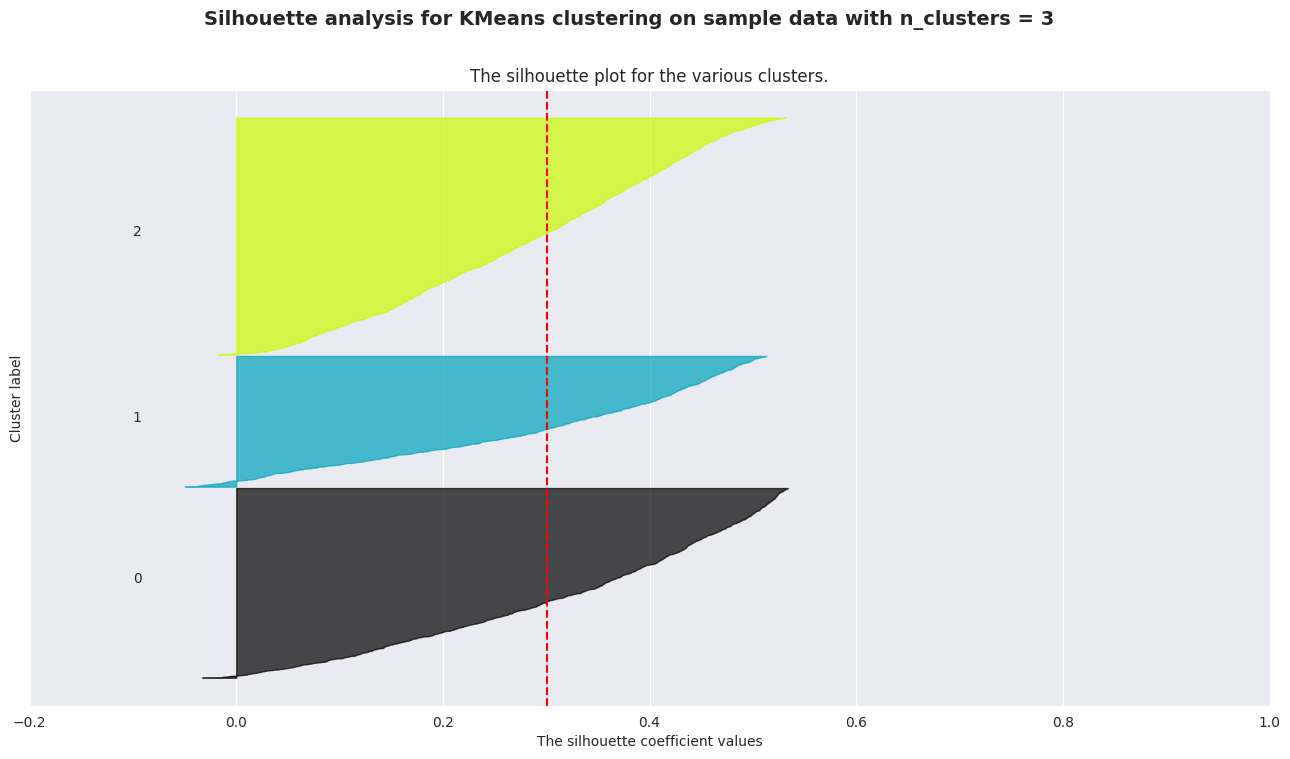

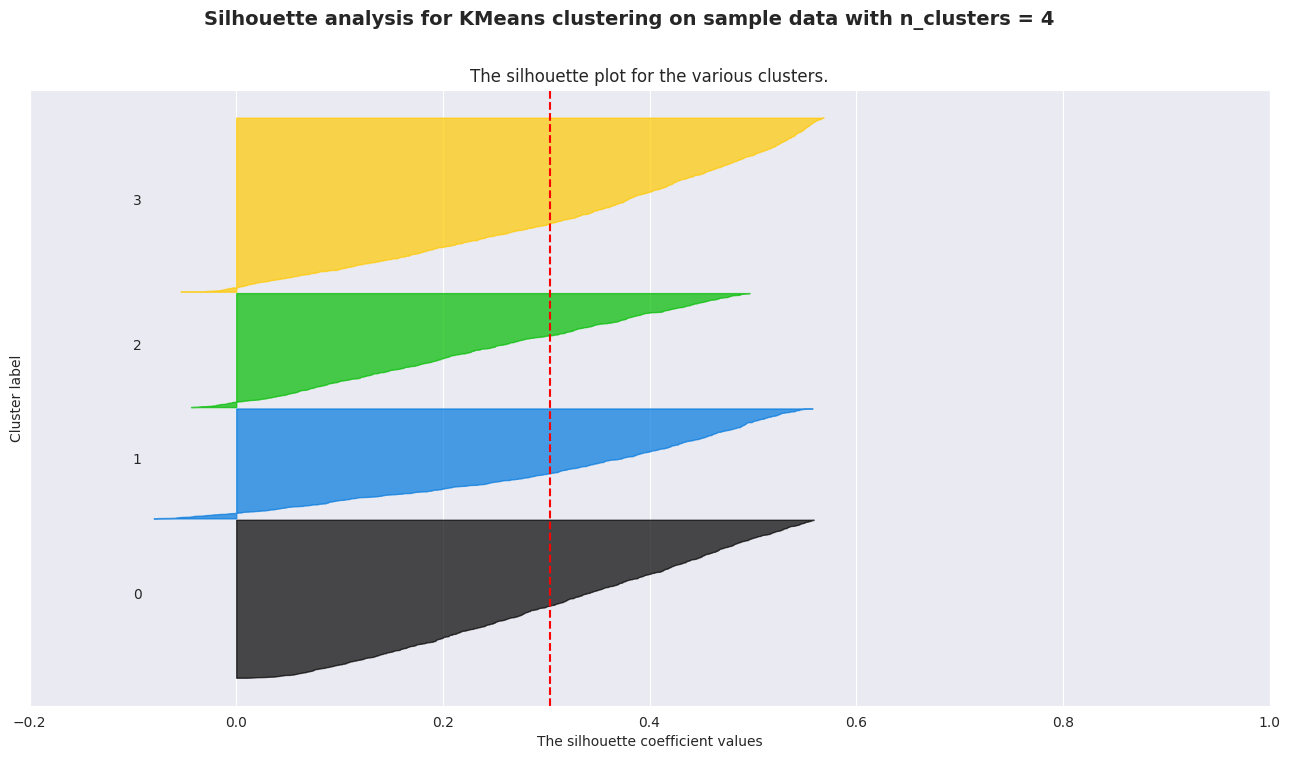

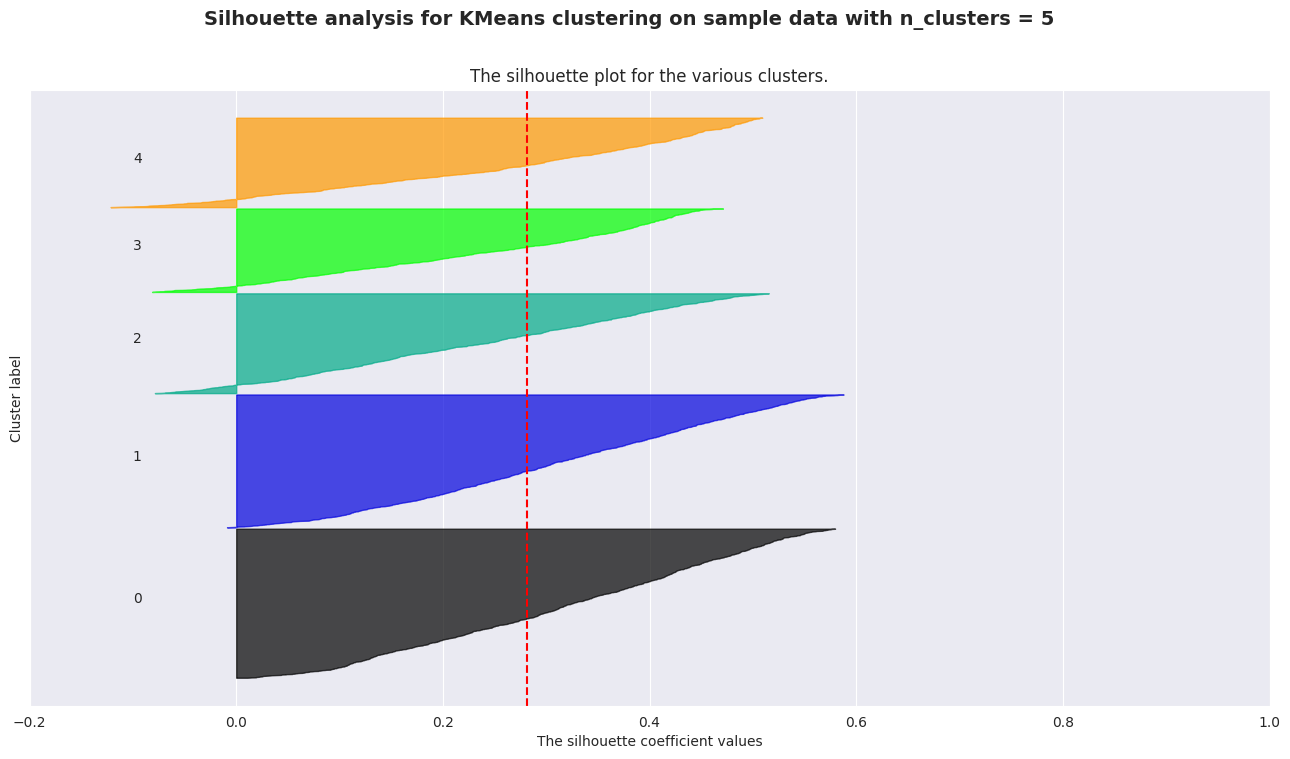

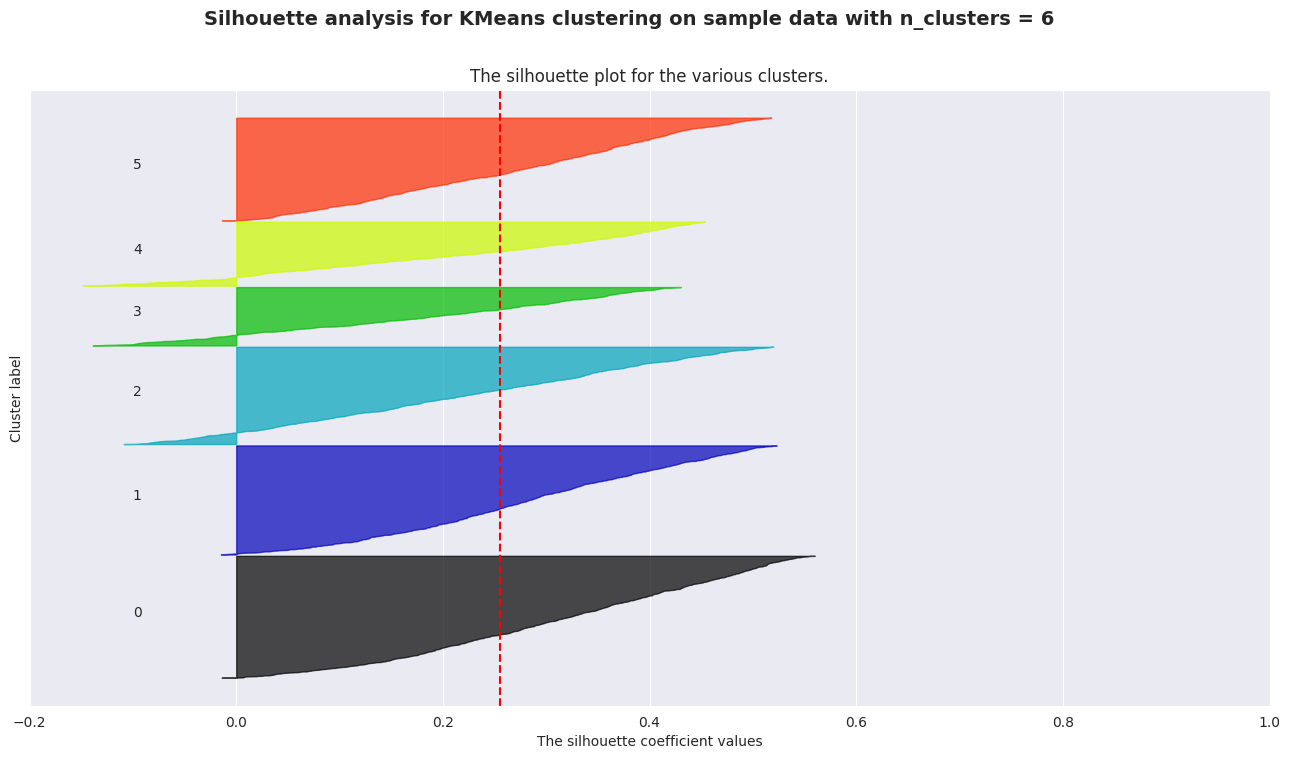

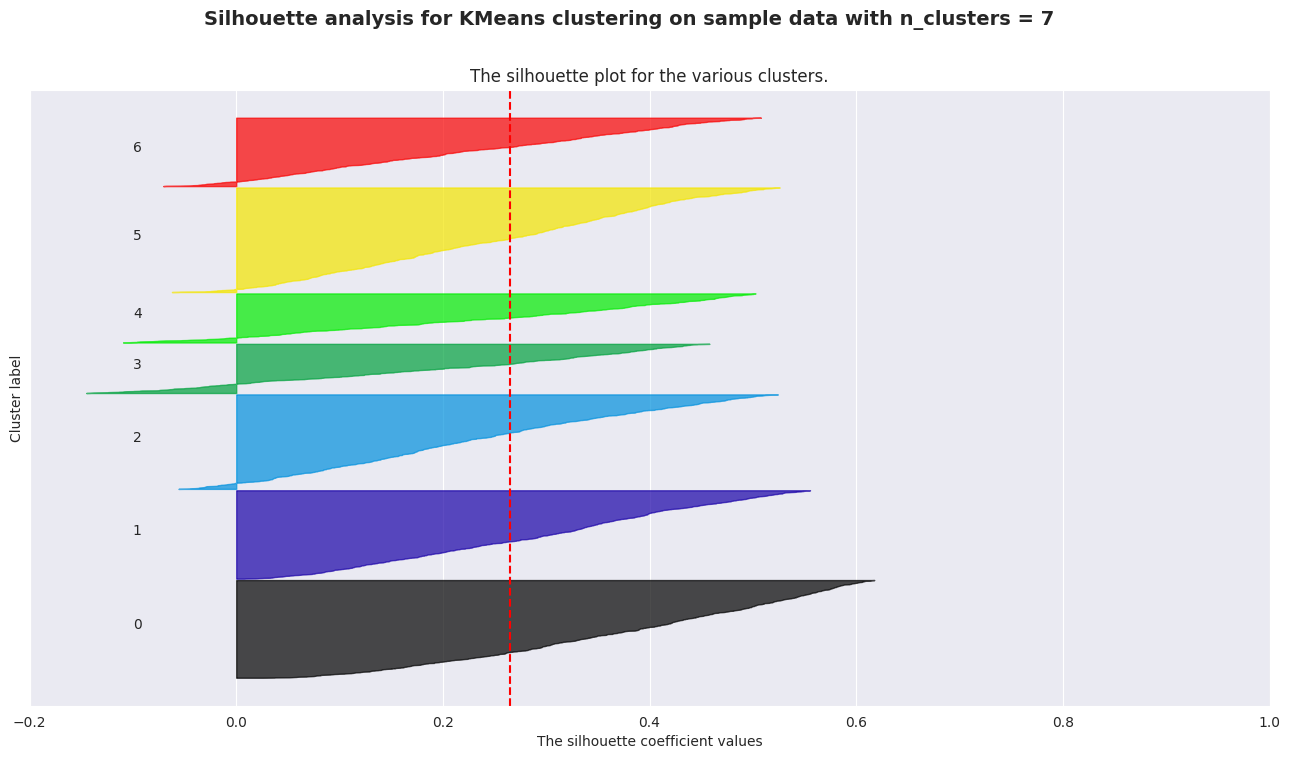

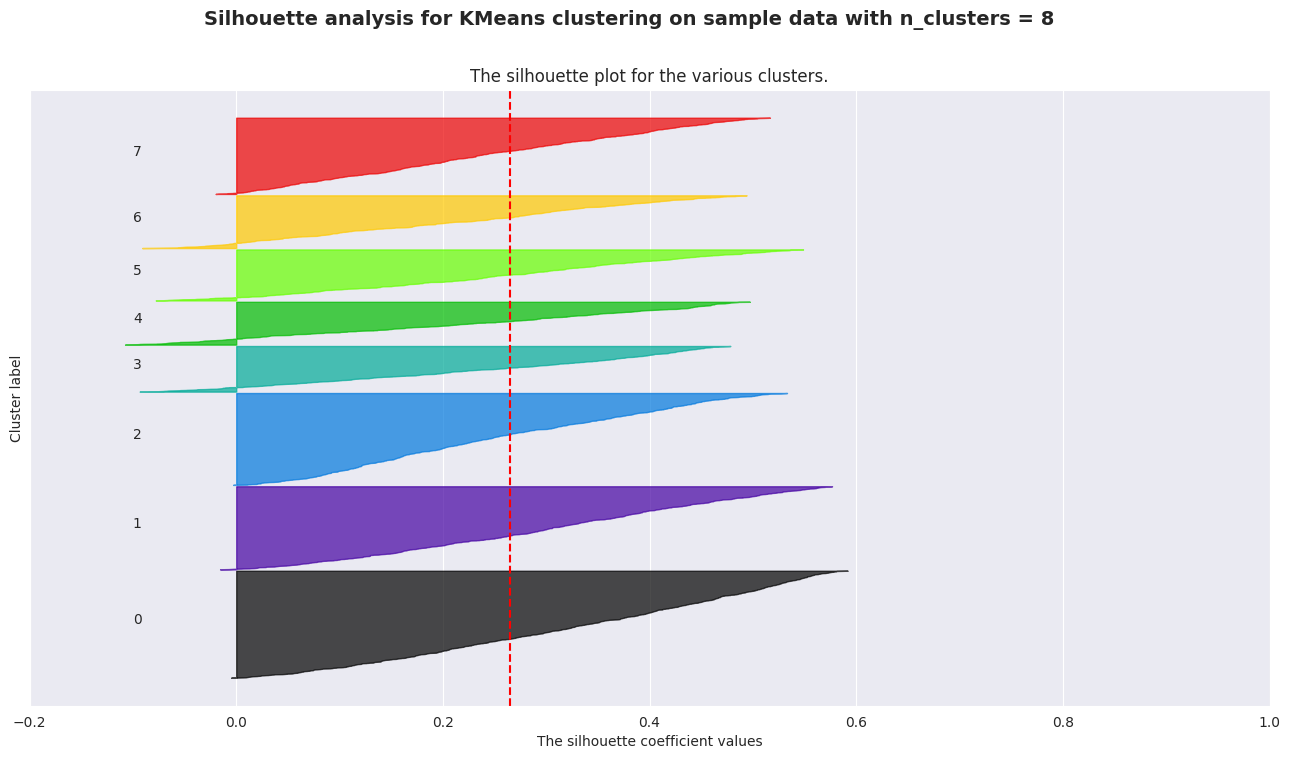

In [ ]:
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1,n_init='auto')
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')


K=4 have optimal score. Let's visualize these clusters.

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=1,n_init='auto')
cluster_labels = clusterer.fit_predict(data)
cluster_labels

array([0, 1, 0, ..., 2, 1, 0], dtype=int32)

In [ ]:
# add cluster label to each data point
customer_data['Cluster'] = cluster_labels
customer_data.sample(10)

,CustomerID,MonetaryValue,Frequency,Recency,Cluster
4208,18110.0,5.297317,3.610918,2.995732,2
1799,14798.0,5.163299,2.484907,3.970292,3
1674,14625.0,6.803095,3.970292,5.283204,0
2374,15576.0,6.826946,3.761200,3.637586,0
2377,15579.0,5.794841,3.871201,4.234107,0
445,12921.0,9.716440,6.579251,2.302585,1
2846,16217.0,5.721131,2.708050,5.463832,3
1721,14690.0,5.875071,3.871201,3.806662,2
62,12424.0,7.474182,3.401197,5.093750,0
2801,16162.0,3.648057,0.693147,5.533389,3


In [ ]:
# calculate mean of each feature for clusters
cluster_data = customer_data.groupby('Cluster').mean()
cluster_data

,CustomerID,MonetaryValue,Frequency,Recency
Cluster,,,,
0,15240.871046,7.015840,4.165890,4.370058
1,15187.686480,8.213518,5.282685,2.160910
2,15364.564045,6.197210,3.442529,2.750845
3,15382.131811,5.425580,2.352695,5.008166


In [ ]:
cluster_data.drop(columns=['CustomerID'], inplace=True)

In [ ]:
# We have log-transformed the features now to get more intuition take exponential of each feature
cluster_data = cluster_data.applymap(np.exp)#Apply a function to a Dataframe elementwise.This method applies a function that accepts and returns a scalar
#to every element of a DataFrame.
cluster_data = cluster_data.applymap(int)
cluster_data

<ipython-input-125-1c940875f120>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-125-1c940875f120>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,MonetaryValue,Frequency,Recency
Cluster,,,
0,1114,64,79
1,3690,196,8
2,491,31,15
3,227,10,149


## **Conclusion**

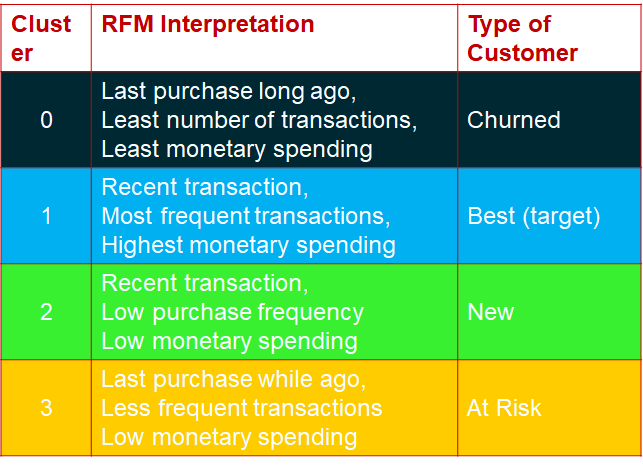